In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.utils import resample

In [ ]:
df = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [ ]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [ ]:
df.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [ ]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

#no of duplicates in the dataset

In [ ]:
no_of_duplicates = df.duplicated().sum(axis=0)
no_of_duplicates

21

In [ ]:
df = df.drop_duplicates()
df

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...
23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [ ]:
df.duplicated().sum(axis=0)

0

In [ ]:
df.isnull().sum()

Clothing ID                   0
Age                           0
Title                      3789
Review Text                 825
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [ ]:
df['Title'].isnull().sum()

3789

code to remove rows with review heading as null

In [ ]:
df.dropna(subset=['Review Text'], inplace= True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


# EDA

### counting the no of values in recommendations (1- recomennded, 0 - not recommended )

In [ ]:
df['Recommended IND'].value_counts()

1    18539
0     4101
Name: Recommended IND, dtype: int64

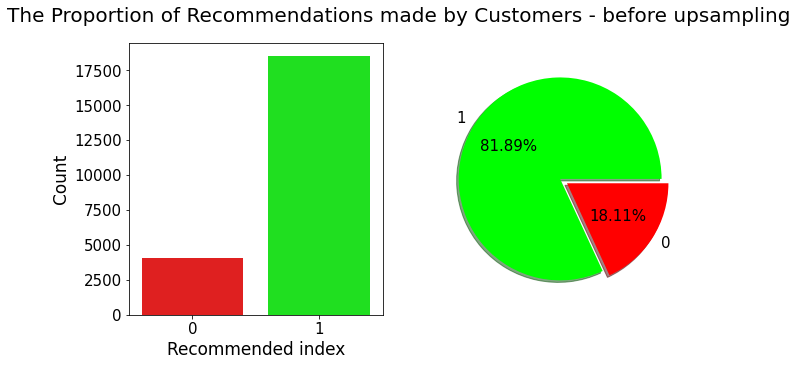

In [ ]:

fig = plt.figure(figsize=(10,5))
fig.suptitle("The Proportion of Recommendations made by Customers - before upsampling",fontsize=20)
plt.subplot(1, 2, 1)
# Unique category labels: 'Diet', 'MOD-PA'...
color_labels = df['Recommended IND'].unique()
palette = ["#ff0000","#00ff00"]
sns.countplot(x= df['Recommended IND'],data=df,palette=palette)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Recommended index",fontsize=17)
plt.ylabel("Count",fontsize=17)
plt.subplot(1, 2, 2)
plt.pie(x= df['Recommended IND'].value_counts(),colors=["#00ff00","#ff0000"], labels = ("1","0"), 
        explode = (0, 0.08), shadow = True, autopct = '%1.2f%%',textprops={'fontsize': 15})
plt.xticks(fontsize=15)
plt.show()

since the gap between the no of not recommended polls and recommended polls is really high, we will do some upscaling to make the gap smaller. 

This process prevents the models from inclining towards the majority class

In [ ]:
df_majority = df[(df["Recommended IND"]==1)]
df_minority = df[(df['Recommended IND']==0)]


df_minority_upsampled = resample(df_minority,replace=True,n_samples=15539,random_state=42)

df_upsampled = pd.concat([df_minority_upsampled,df_majority])

In [ ]:
df['Recommended IND'].value_counts()

1    18539
0     4101
Name: Recommended IND, dtype: int64

In [ ]:
df_upsampled['Recommended IND'].value_counts()

1    18539
0    15539
Name: Recommended IND, dtype: int64

In [ ]:
df_upsampled["Recommended IND"].value_counts

<bound method IndexOpsMixin.value_counts of 4926     0
21598    0
17773    0
2579     0
19705    0
        ..
23479    1
23481    1
23482    1
23484    1
23485    1
Name: Recommended IND, Length: 34078, dtype: int64>

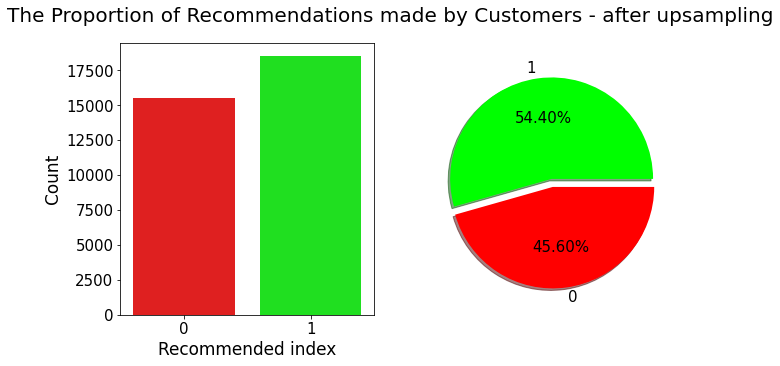

In [ ]:
fig = plt.figure(figsize=(10,5))
fig.suptitle("The Proportion of Recommendations made by Customers - after upsampling",fontsize=20)
plt.subplot(1, 2, 1)
# Unique category labels: 'Diet', 'MOD-PA'...
color_labels = df_upsampled['Recommended IND'].unique()
palette = ["#ff0000","#00ff00"]
sns.countplot(x= df_upsampled['Recommended IND'],data=df_upsampled,palette=palette)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Recommended index",fontsize=17)
plt.ylabel("Count",fontsize=17)
plt.subplot(1, 2, 2)
plt.pie(x= df_upsampled['Recommended IND'].value_counts(),colors=["#00ff00","#ff0000"], labels = ("1","0"), 
        explode = (0, 0.08), shadow = True, autopct = '%1.2f%%',textprops={'fontsize': 15})
plt.xticks(fontsize=15)
plt.show()

## 0- not recommended; 1- not recommended

### The above graph shows that a large number of the store's products were recommended by the customers

In [ ]:
df["Rating"].value_counts()

5    12539
4     4908
3     2823
2     1549
1      821
Name: Rating, dtype: int64

In [ ]:
df_rating = df
#1star
row_index = df_rating.index[df_rating['Rating']==1]
df_rating.loc[row_index,'star']='1star'

In [ ]:
#2star
row_index = df_rating.index[df_rating['Rating']==2]
df_rating.loc[row_index,'star']='2star'

In [ ]:
#3star
row_index = df_rating.index[df_rating['Rating']==3]
df_rating.loc[row_index,'star']='3star'

In [ ]:
#4star
row_index = df_rating.index[df_rating['Rating']==4]
df_rating.loc[row_index,'star']='4star'

In [ ]:
#5star
row_index = df_rating.index[df_rating['Rating']==5]
df_rating.loc[row_index,'star']='5star'

In [ ]:
df_rating.head(13)

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,star
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,4star
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,5star
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,3star
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,5star
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,5star
5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,2star
6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,5star
7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits,4star
8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses,5star
9,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1,0,General,Dresses,Dresses,5star


#### making the dataframe for measuring the customer ratings 

In [ ]:
df_rating_subset_star= pd.DataFrame(df_rating.groupby('star').count()["Class Name"])


df_rating_subset_star.rename(columns={'Class Name':'Count'},inplace= True)
df_rating_subset_star

,Count
star,
1star,821
2star,1549
3star,2823
4star,4908
5star,12526


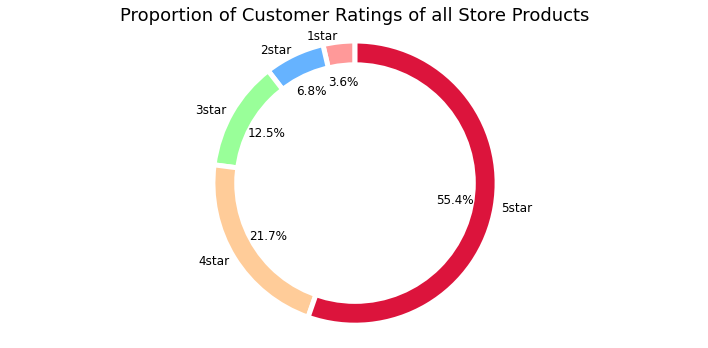

In [ ]:
import matplotlib.pyplot as plt
# Pie chart

#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99',"#DC143C"]
fig1, ax1 = plt.subplots(figsize=(10,5))

#draw circle
centre_circle = plt.Circle((0,0),0.850,fc='white')
plt.title("Proportion of Customer Ratings of all Store Products",fontsize= 18)


#sns.set(font_scale = 2)
plt.rcParams['text.color'] = 'black'
plt.rcParams['font.size'] = 12

ax1.pie(df_rating_subset_star['Count'], colors = colors, labels=df_rating_subset_star.index, autopct='%1.1f%%',
        wedgeprops = { 'linewidth' : 5, 'edgecolor' : 'white' } ,startangle=90,
        pctdistance=0.715, labeldistance=1.04)

fig = plt.gcf()

fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()

plt.show()

##### The above chart confirms that more than 50% of the customer rated the store products very highly, 
##### while less than 12%(customers who rated 1 and 2) were not happy with their purchase

In [ ]:
df["Division Name"].value_counts()

General           13364
General Petite     7837
Initmates          1426
Name: Division Name, dtype: int64

["#B0C4DE","#40E0D0","#DAA520","#4169E1","#DC143C"]

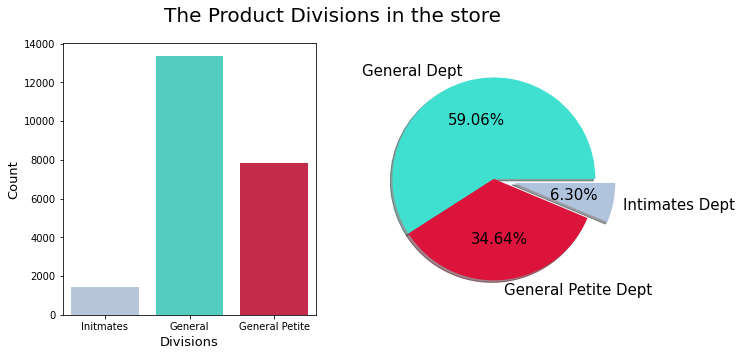

In [ ]:
fig = plt.figure(figsize=(10,5))
fig.suptitle("The Product Divisions in the store",fontsize=20)
plt.subplot(1, 2, 1)
# Unique category labels: 'Diet', 'MOD-PA'...
color_labels = df['Division Name'].unique()
palette = ["#B0C4DE","#40E0D0","#DC143C"]
sns.countplot(x= df['Division Name'],data=df,palette=palette)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Divisions",fontsize=13)
plt.ylabel("Count",fontsize=13)

plt.subplot(1, 2, 2)
plt.pie(x= df['Division Name'].value_counts(),colors=['#40E0D0',"#DC143C",'#B0C4DE'], labels = ('General Dept','General Petite Dept',"Intimates Dept"), 
        explode = (0, 0,0.2), shadow = True, autopct = '%1.2f%%',textprops={'fontsize': 15})
plt.xticks(fontsize=15)
plt.show()

#### more than 50% of clothes are bought from the General dept while the intimates dept accounts for only about 7% of the total store purchaces.

In [ ]:
df["Department Name"].value_counts()

Tops        10048
Dresses      6145
Bottoms      3661
Intimate     1653
Jackets      1002
Trend         118
Name: Department Name, dtype: int64

In [ ]:
df['Department Name']

0        Intimate
1         Dresses
2         Dresses
3         Bottoms
4            Tops
           ...   
23481     Dresses
23482        Tops
23483     Dresses
23484     Dresses
23485     Dresses
Name: Department Name, Length: 22640, dtype: object

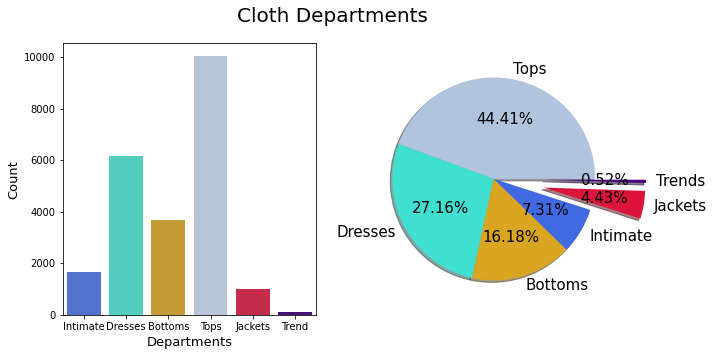

In [ ]:
fig = plt.figure(figsize=(10,5))
fig.suptitle("Cloth Departments",fontsize=20)
plt.subplot(1, 2, 1)
# Unique category labels: 'Diet', 'MOD-PA'...
color_labels = df['Department Name'].unique()
palette = ["#4169E1","#40E0D0","#DAA520","#B0C4DE","#DC143C",'#4B0082']
sns.countplot(x= df['Department Name'],data=df,palette=palette)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Departments",fontsize=13)
plt.ylabel("Count",fontsize=13)

plt.subplot(1, 2, 2)
plt.pie(x= df['Department Name'].value_counts(),colors=["#B0C4DE","#40E0D0","#DAA520","#4169E1","#DC143C",'#4B0082'],
        labels = ('Tops','Dresses',"Bottoms","Intimate","Jackets","Trends"), 
        explode = (0, 0, 0, 0, 0.5, 0.5), shadow = True, autopct = '%1.2f%%',textprops={'fontsize': 15})
plt.xticks(fontsize=15)
plt.show()

#### above graph confirms that the store actively sold clothes from the Tops dept, and not as much in the Trends Dept

In [ ]:
df["Age"].value_counts().sort_index()[0:50]

18       4
19      40
20     105
21      98
22     140
23     245
24     235
25     320
26     413
27     330
28     406
29     503
30     382
31     549
32     594
33     699
34     766
35     851
36     801
37     726
38     751
39    1226
40     584
41     717
42     625
43     555
44     596
45     511
46     691
47     545
48     605
49     474
50     385
51     385
52     421
53     536
54     391
55     314
56     462
57     350
58     274
59     316
60     335
61     220
62     333
63     234
64     240
65     220
66     273
67     154
Name: Age, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


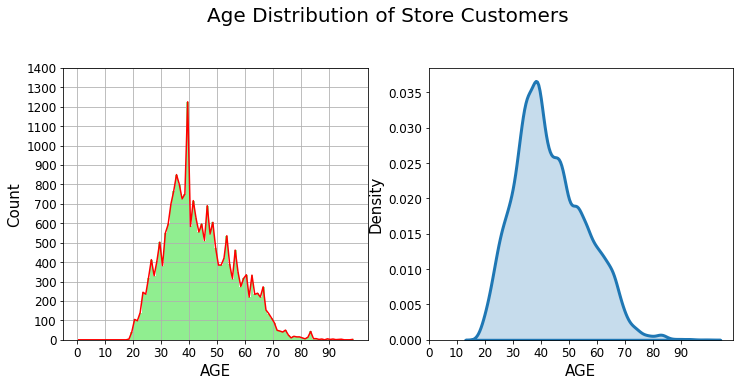

                   Majority of the Customers are between 30 - 50 years of age


In [ ]:
plt.figure(figsize=(12,5))
subtitle_string = "Majority of the Customers are between 30 - 50 years of age"
plt.suptitle("Age Distribution of Store Customers",y=1.05,fontsize= 20)

plt.subplot(1,2,1)

width = 1
counts, bins, bars = plt.hist(data=df, x='Age', bins=np.arange(0, 100, width),color='lightgreen')

plt.plot(bins[:-1] + width/2, counts,color='red')
plt.xticks(np.arange(0,100,10))
plt.yticks(np.arange(0,1500,100))
plt.grid()
plt.xlabel("AGE",fontsize=15)
plt.ylabel("Count",fontsize=15)

plt.subplot(1,2,2)
sns.distplot(df['Age'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3})
plt.xlabel("AGE",fontsize=15)
plt.ylabel("Density",fontsize=15)
plt.xticks(np.arange(0,100,10))
plt.show()
print("                   "+subtitle_string)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


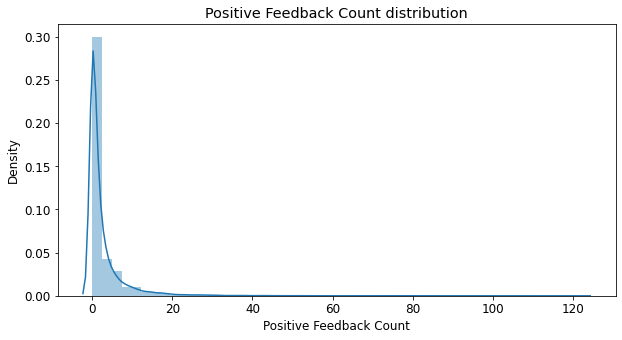

In [ ]:
plt.figure(figsize = (10,5))

plt.title = ('Positive Feedback Count')

sns.distplot(df['Positive Feedback Count']).set_title("Positive Feedback Count distribution")
plt.show()

<Figure size 1080x720 with 0 Axes>

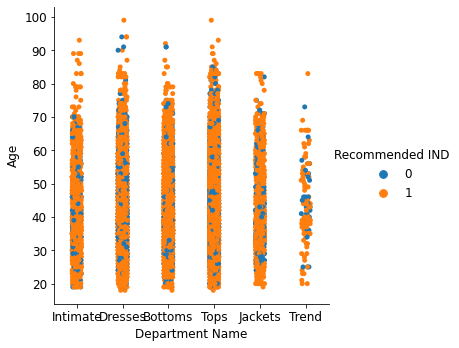

In [ ]:
plt.figure(figsize=(15,10))
sns.catplot(x="Department Name", y="Age", hue="Recommended IND",data= df)
plt.show()

### the majority of the products from all the departments are fast moving/selling

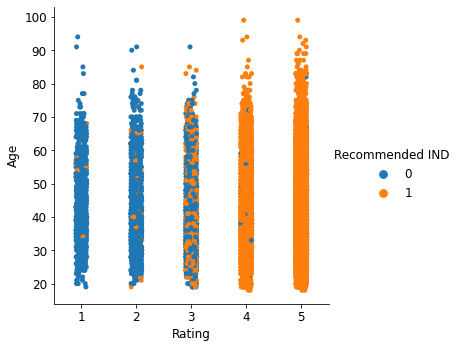

In [ ]:
sns.catplot(x="Rating", y="Age", hue="Recommended IND",data= df)

### product with 1-2 rating are clearly not popular with customers, while those with 4-5 rating are selling very well. 

### Special Preprocessing 

##### we're performing below steps to experiment with the different text manipulation techniques to see the most common words




1. removing punctuations
2. Tokenization- splitting strings into substrings
3. removing numbers
4. filtering stop words
5. Lemmatization

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22640 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              22640 non-null  int64 
 1   Age                      22640 non-null  int64 
 2   Title                    19675 non-null  object
 3   Review Text              22640 non-null  object
 4   Rating                   22640 non-null  int64 
 5   Recommended IND          22640 non-null  int64 
 6   Positive Feedback Count  22640 non-null  int64 
 7   Division Name            22627 non-null  object
 8   Department Name          22627 non-null  object
 9   Class Name               22627 non-null  object
 10  star                     22640 non-null  object
dtypes: int64(5), object(6)
memory usage: 2.6+ MB


#### for modelling we will only use certain features for sentiment analysis
#### we can drop the remaining columns from the dataframe

In [ ]:
df.drop([ "Clothing ID","Age","Title","Rating","Positive Feedback Count","Division Name",
         "Department Name","Class Name","star"], axis = 1, inplace = True)

In [ ]:
df.head()

,Review Text,Recommended IND
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


###### importing text manipulation libraries

In [ ]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download("stopwords")
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
str(df["Review Text"])

"0        Absolutely wonderful - silky and sexy and comf...\n1        Love this dress!  it's sooo pretty.  i happene...\n2        I had such high hopes for this dress and reall...\n3        I love, love, love this jumpsuit. it's fun, fl...\n4        This shirt is very flattering to all due to th...\n                               ...                        \n23481    I was very happy to snag this dress at such a ...\n23482    It reminds me of maternity clothes. soft, stre...\n23483    This fit well, but the top was very see throug...\n23484    I bought this dress for a wedding i have this ...\n23485    This dress in a lovely platinum is feminine an...\nName: Review Text, Length: 22640, dtype: object"

#### 1. removing punctuations

In [ ]:
#sample code below for removing punctuation

In [ ]:
text = re.sub("n't",'not', str(df["Review Text"]))
# removing words like not and " n't" in words like wouldn't
text = re.sub('[^\w\s]','', str(df["Review Text"]))
# removing all elements except alphabets and white spaces.

In [ ]:
#creating a function for main function

In [ ]:
def punctuation_filter(df):
    filtered_text= re.sub("n't",'not', df)
    filtered_text= re.sub('[^\w\s]','', df)
    return filtered_text

In [ ]:
final_text=punctuation_filter(str(df["Review Text"]))
final_text

'0        Absolutely wonderful  silky and sexy and comf\n1        Love this dress  its sooo pretty  i happene\n2        I had such high hopes for this dress and reall\n3        I love love love this jumpsuit its fun fl\n4        This shirt is very flattering to all due to th\n                                                       \n23481    I was very happy to snag this dress at such a \n23482    It reminds me of maternity clothes soft stre\n23483    This fit well but the top was very see throug\n23484    I bought this dress for a wedding i have this \n23485    This dress in a lovely platinum is feminine an\nName Review Text Length 22640 dtype object'

#### 2. Tokenization 

In [ ]:
# word_tokenize- It is a Tokenizer that divides strings into lists of substrings

In [ ]:
#function to perform tokenization
def word_token_splitter(df):
    words = word_tokenize(df)
    return words


#converting words to lower case
final_text_tokens = final_text.lower()
#tokens
word_list = word_token_splitter(final_text_tokens)
word_list

['0',
 'absolutely',
 'wonderful',
 'silky',
 'and',
 'sexy',
 'and',
 'comf',
 '1',
 'love',
 'this',
 'dress',
 'its',
 'sooo',
 'pretty',
 'i',
 'happene',
 '2',
 'i',
 'had',
 'such',
 'high',
 'hopes',
 'for',
 'this',
 'dress',
 'and',
 'reall',
 '3',
 'i',
 'love',
 'love',
 'love',
 'this',
 'jumpsuit',
 'its',
 'fun',
 'fl',
 '4',
 'this',
 'shirt',
 'is',
 'very',
 'flattering',
 'to',
 'all',
 'due',
 'to',
 'th',
 '23481',
 'i',
 'was',
 'very',
 'happy',
 'to',
 'snag',
 'this',
 'dress',
 'at',
 'such',
 'a',
 '23482',
 'it',
 'reminds',
 'me',
 'of',
 'maternity',
 'clothes',
 'soft',
 'stre',
 '23483',
 'this',
 'fit',
 'well',
 'but',
 'the',
 'top',
 'was',
 'very',
 'see',
 'throug',
 '23484',
 'i',
 'bought',
 'this',
 'dress',
 'for',
 'a',
 'wedding',
 'i',
 'have',
 'this',
 '23485',
 'this',
 'dress',
 'in',
 'a',
 'lovely',
 'platinum',
 'is',
 'feminine',
 'an',
 'name',
 'review',
 'text',
 'length',
 '22640',
 'dtype',
 'object']

#### 3. Removing numbers

In [ ]:
#removing_numbers

In [ ]:
#defining a function to keep only alphabets(excluding numbers)
def number_filter(df):
    final_text=[text for text in df if text.isalpha()]
    return final_text

In [ ]:
#removing numbers from the list of tokens
words_without_num = number_filter(word_list)

#### 4. Removing / Filtering stop-words

In [ ]:
stop_words=stopwords.words("english")
new_stopping_words = stop_words[:len(stop_words)-36]
new_stopping_words.remove("not")

In [ ]:
def stopword_filter(df):
    #removing stop words from the substrings
    final_text= [text for text in df if text not in new_stopping_words]
    return final_text

In [ ]:
sub_words = stopword_filter(words_without_num)


#### 5. Lemmatization

In [ ]:
#lemmatizer does a morphological analysis of the words
# for ex: running, ran, runs have the same meaning as Run. So they are all grouped under Run.
def lemmatizer_func(df):
    final_data= [WordNetLemmatizer().lemmatize(word) for word in df]
    return final_data

In [ ]:
lemmatized_words = lemmatizer_func(sub_words)

In [ ]:
# we'll make a function to combine these together

In [ ]:
str(df["Review Text"])

"0        Absolutely wonderful - silky and sexy and comf...\n1        Love this dress!  it's sooo pretty.  i happene...\n2        I had such high hopes for this dress and reall...\n3        I love, love, love this jumpsuit. it's fun, fl...\n4        This shirt is very flattering to all due to th...\n                               ...                        \n23481    I was very happy to snag this dress at such a ...\n23482    It reminds me of maternity clothes. soft, stre...\n23483    This fit well, but the top was very see throug...\n23484    I bought this dress for a wedding i have this ...\n23485    This dress in a lovely platinum is feminine an...\nName: Review Text, Length: 22640, dtype: object"

In [ ]:
def text_cleaning(df):
    text = punctuation_filter(str(df))
    text = word_token_splitter(text.lower())
    text = number_filter(text)
    text = stopword_filter(text)
    text = lemmatizer_func(text)
    return " ".join(text)

In [ ]:
df["Review Text"] = df["Review Text"].apply(text_cleaning)

In [ ]:
df.head()

,Review Text,Recommended IND
0,absolutely wonderful silky sexy comfortable,1
1,love dress sooo pretty happened find store im ...,1
2,high hope dress really wanted work initially o...,0
3,love love love jumpsuit fun flirty fabulous ev...,1
4,shirt flattering due adjustable front tie perf...,1


### ML modelling

#### we will be using TF-IDF Vectorizer to transform our data into vectors. Tf-IDF measures the relevance of a paticular data in a document

In [ ]:


from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [ ]:
# we will be using the upsampled data to train the models as it will enable us to achieve a better accuracy.

In [ ]:
df_upsampled["Review Text"] = df_upsampled["Review Text"].apply(text_cleaning)

In [ ]:
X_reviews = df["Review Text"]
y_ind = df["Recommended IND"]

#we use stratify to ensure even splitting between test and train data
X_train_us, X_test_us, y_train_us, y_test_us = train_test_split(X_reviews, y_ind, test_size=0.2, stratify=y_ind, random_state=101)

In [ ]:
X_reviews = df_upsampled["Review Text"]
y_ind = df_upsampled["Recommended IND"]

#we use stratify to ensure even splitting between test and train data
X_train, X_test, y_train, y_test = train_test_split(X_reviews, y_ind, test_size=0.2, stratify=y_ind, random_state=101)

In [ ]:

print("shape of X train data , shape of X test data")
X_train.shape,X_test.shape

shape of X train data , shape of X test data


((27262,), (6816,))

In [ ]:
X_train.head(3)

6412     fit like model even though im really happy cas...
13045    simple dress turn head fit body hugging right ...
16941    badly wanted dress work material color beautif...
Name: Review Text, dtype: object

In [ ]:
y_train.head(3)

6412     1
13045    1
16941    0
Name: Recommended IND, dtype: int64

### now we vectorize the data using TF-IDF Vectorizer 

In [ ]:
TF_IDF_vectorizer  = TfidfVectorizer()

X_train_vector = TF_IDF_vectorizer.fit_transform(X_train)
X_test_vector = TF_IDF_vectorizer.transform(X_test)

In [ ]:
#not the upscaled data
TF_IDF_vectorizer_us  = TfidfVectorizer()


X_train_vector_us = TF_IDF_vectorizer_us.fit_transform(X_train_us)
X_test_vector_us = TF_IDF_vectorizer_us.transform(X_test_us)

In [ ]:
X_test_vector_us.toarray().shape

(4528, 14838)

In [ ]:
X_train_vector_us.toarray().shape

(18112, 14838)

In [ ]:
X_train_vector.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
#shape of Xtrain TF-IDF vector
X_train_vector.toarray().shape

(27262, 15116)

In [ ]:
#to get the feature names
TF_IDF_vectorizer.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['aa',
 'aaaaandidontwanttopayforshipping',
 'aaaaannnnnnd',
 'aaaahmazing',
 'aaahed',
 'aame',
 'ab',
 'abbey',
 'abby',
 'abck',
 'abdomen',
 'abdominal',
 'abercrombie',
 'abhor',
 'ability',
 'abject',
 'able',
 'abnormally',
 'abo',
 'abovetheknee',
 'abroad',
 'abruptly',
 'abso',
 'absolute',
 'absolutely',
 'absolutley',
 'absolutly',
 'absoluty',
 'absorbent',
 'abstract',
 'absurd',
 'abt',
 'abundance',
 'abundant',
 'abused',
 'ac',
 'acacia',
 'accent',
 'accented',
 'accenting',
 'accentuate',
 'accentuatea',
 'accentuated',
 'accentuates',
 'accentuating',
 'accept',
 'acceptabl',
 'acceptable',
 'acceptably',
 'accepted',
 'accepts',
 'access',
 'accesso',
 'accessorize',
 'accessorized',
 'accessorizes',
 'accessorizing',
 'accessory',
 'accident',
 'accidental',
 'accidentally',
 'acco',
 'accomadate',
 'accommodate',
 'accommodated',
 'accommodates',
 'accommodating',
 'accomodate',
 'accompanies',
 'accompany',
 'accompanying',
 'accomplish',
 'accomplishing',
 'ac

In [ ]:
TF_IDF_vectorizer_us.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['aa',
 'aaaaandidontwanttopayforshipping',
 'aaaaannnnnnd',
 'aaaahmazing',
 'aaahed',
 'aame',
 'ab',
 'abbey',
 'abby',
 'abck',
 'abdomen',
 'abercrombie',
 'ability',
 'abject',
 'able',
 'abnormal',
 'abnormally',
 'abo',
 'abolutely',
 'abou',
 'abovetheknee',
 'abovetheshoulders',
 'abroad',
 'abruptly',
 'abso',
 'absolute',
 'absolutely',
 'absolutley',
 'absolutly',
 'absoluty',
 'abstract',
 'absurd',
 'absurdly',
 'abt',
 'abundance',
 'abundant',
 'abused',
 'ac',
 'acacia',
 'accent',
 'accented',
 'accenting',
 'accentuate',
 'accentuated',
 'accentuates',
 'accentuating',
 'accept',
 'acceptabl',
 'acceptable',
 'acceptably',
 'accepted',
 'accepts',
 'access',
 'accessorize',
 'accessorized',
 'accessorizes',
 'accessorizing',
 'accessory',
 'accident',
 'accidental',
 'accidentally',
 'acco',
 'accomadate',
 'accommodate',
 'accommodated',
 'accommodates',
 'accommodating',
 'accomodate',
 'accompanies',
 'accompany',
 'accompanying',
 'accomplish',
 'accomplishing',

In [ ]:
# we now make a dataframe to express the relevancy of each feature

vector_feature_df  = pd.DataFrame(X_train_vector.toarray(), columns = TF_IDF_vectorizer.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
vector_feature_df.iloc[:]

,aa,aaaaandidontwanttopayforshipping,aaaaannnnnnd,aaaahmazing,aaahed,aame,ab,abbey,abby,abck,...,zippered,zipperi,zippie,zipping,zombie,zone,zoolanders,zoom,zooming,zuma
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27257,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27258,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27259,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
feature_df = vector_feature_df.sum(axis=0).sort_values(ascending=False)

### Top 10 words from the reviews based on the TF-IDF

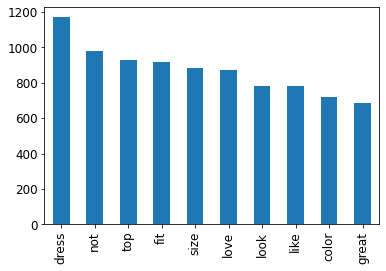

In [ ]:
feature_df[:10].plot.bar()

In [ ]:
df_upsampled.corr()

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
Clothing ID,1.000000,0.023822,-0.006410,-0.012857,0.043742
Age,0.023822,1.000000,0.035466,0.048531,0.034964
Rating,-0.006410,0.035466,1.000000,0.838659,-0.076262
Recommended IND,-0.012857,0.048531,0.838659,1.000000,-0.079187
Positive Feedback Count,0.043742,0.034964,-0.076262,-0.079187,1.000000


### importing libraries for the ml modelling techniques



In [ ]:
  #models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier


#importing metrics to measure model performance
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import precision_score
from sklearn.metrics import  f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score


#### The ML models i will be using to classify the reviews are as below

Models i use:

1. Logistic regression
2. Linear Support Vector Machine
3. Decision Tree
4. Random Forest
5. AdaBoosting

In [ ]:
#creating a function to calculate the parameters like Train_Score, Test_Score, Precision_Score, 
#Recall_Score, F1_Score and accuracy

In [ ]:
def classification_funct(model, scaled_Xtrain, ytrain, scaled_Xtest, ytest, pred, model_name):
    
    result_df = pd.DataFrame({'Train_Score':model.score(scaled_Xtrain,ytrain),"Test_Score":model.score(scaled_Xtest,ytest),
                       "Precision_Score":precision_score(ytest,pred),"Recall_Score":recall_score(ytest,pred),
                       "F1_Score":f1_score(ytest,pred) , "accuracy":accuracy_score(ytest,pred)}, index=[model_name])
    return result_df

### Logistic Regression with TF-IDF Vectorizer

st

In [ ]:
#the data scaled using the TF-IDF vectorizer, will be used to train the models and print the model score

lr = LogisticRegression()
# Fit the model
lr.fit(X_train_vector, y_train)
#predict x_test
pred_lr = lr.predict(X_test_vector)

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr, X_train_vector, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.88815548 0.87458746 0.89801908 0.89251651 0.90058694 0.89655172
 0.8943507  0.89618489 0.90315481 0.90242113]


In [ ]:
X_train_vector.shape

(27262, 15116)

In [ ]:
y_train

6412     1
13045    1
16941    0
17716    1
17264    1
        ..
11839    1
13380    1
20304    1
783      0
3223     1
Name: Recommended IND, Length: 27262, dtype: int64

In [ ]:
score_lr= classification_funct(lr,X_train_vector, y_train ,X_test_vector ,y_test,pred_lr,"logisitc regression" )
score_lr



,Train_Score,Test_Score,Precision_Score,Recall_Score,F1_Score,accuracy
logisitc regression,0.918018,0.893633,0.908071,0.895092,0.901535,0.893633


In [ ]:
#for the data that has not been upscaled, the model performance deviate a bit

lr_us = LogisticRegression()
# Fit the model
lr_us.fit(X_train_vector_us, y_train_us)
#predict x_test
pred_lr_us = lr_us.predict(X_test_vector_us)

result_df = pd.DataFrame({'Train_Score':lr_us.score(X_train_vector_us,y_train_us),"Test_Score":lr_us.score(X_test_vector_us,y_test_us),
                       "Precision_Score":precision_score(y_test_us,pred_lr_us),"Recall_Score":recall_score(y_test_us,pred_lr_us),
                       "F1_Score":f1_score(y_test_us,pred_lr_us) , "accuracy":accuracy_score(y_test_us,pred_lr_us)}, index=["lr for data without upscaling"])

In [ ]:
pd.concat([score_lr,result_df])

,Train_Score,Test_Score,Precision_Score,Recall_Score,F1_Score,accuracy
logisitc regression,0.918018,0.893633,0.908071,0.895092,0.901535,0.893633
lr for data without upscaling,0.910280,0.891564,0.904451,0.970065,0.936109,0.891564


### confusion matrix for logistic regression

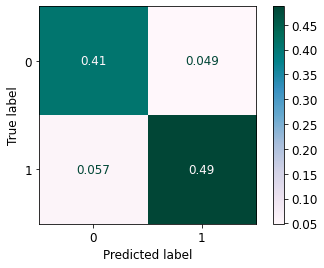

In [ ]:
#confusion matrix for visualizing model errors
conf = confusion_matrix(y_test, pred_lr ,normalize="all")
disp = ConfusionMatrixDisplay(conf).plot(cmap=plt.cm.PuBuGn)


### AUROC- graph for Logistic Regression
###### area under reciver operating characteristics curve

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.953


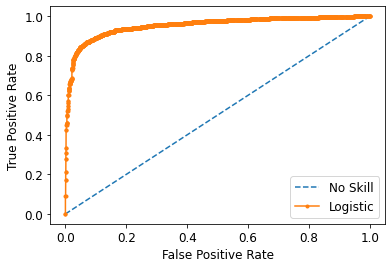

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = lr.predict_proba(X_test_vector)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')



plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### Support Vector Machine (SVM)  with TF-IDF vectorization

In [ ]:
#the data scaled using the TF-IDF vectorizer, will be used to train the models and print the model score

svc = SVC(random_state=0,C=0.2,kernel='rbf',probability=True)
#fitting model
svc.fit(X_train_vector, y_train)
#predict
pred_svc = svc.predict(X_test_vector)

In [ ]:
score_svm= classification_funct(svc,X_train_vector, y_train ,X_test_vector ,y_test,pred_svc,"Support Vector Machine" )
score_svm

,Train_Score,Test_Score,Precision_Score,Recall_Score,F1_Score,accuracy
Support Vector Machine,0.94076,0.913146,0.938626,0.899137,0.918457,0.913146


In [ ]:
#for the data that has not been upscaled, the model performance deviatest a bit

svm_us = SVC(random_state=0, C=0.2, kernel='rbf', probability=True)
# Fit the model
svm_us.fit(X_train_vector_us, y_train_us)
#predict x_test
pred_svm_us = svm_us.predict(X_test_vector_us)

result_df = pd.DataFrame({'Train_Score':svm_us.score(X_train_vector_us,y_train_us),"Test_Score":svm_us.score(X_test_vector_us,y_test_us),
                       "Precision_Score":precision_score(y_test_us,pred_svm_us),"Recall_Score":recall_score(y_test_us,pred_svm_us),
                       "F1_Score":f1_score(y_test_us,pred_svm_us) , "accuracy":accuracy_score(y_test_us,pred_svm_us)}, index=["SVM on data without upscaling"])

In [ ]:
result_df

,Train_Score,Test_Score,Precision_Score,Recall_Score,F1_Score,accuracy
SVM on data without upscaling,0.844247,0.833922,0.831986,0.998921,0.907843,0.833922


### Confusion matrix for SVM classifier

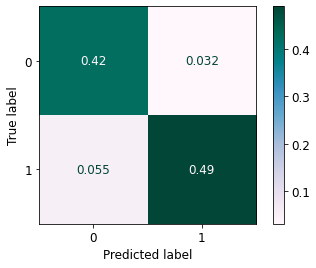

In [ ]:
conf = confusion_matrix(y_test, pred_svc ,normalize="all")
disp = ConfusionMatrixDisplay(conf).plot(cmap=plt.cm.PuBuGn)

### ### AUROC- graph for SVM classifier
###### area under reciver operating characteristics curve

No Skill: ROC AUC=0.500
SVC: ROC AUC=0.965


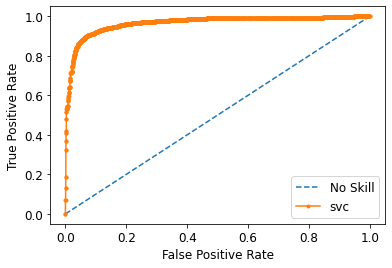

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
svc_probs = svc.predict_proba(X_test_vector)
# keep probabilities for the positive outcome only
svc_probs = svc_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
svc_auc = roc_auc_score(y_test, svc_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVC: ROC AUC=%.3f' % (svc_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
svc_fpr, svc_tpr, _ = roc_curve(y_test, svc_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(svc_fpr, svc_tpr, marker='.', label='svc')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [ ]:
#from sklearn.metrics import roc_curve, auc
#fpr, tpr, thresholds = roc_curve(y_test, pred_svc)

In [ ]:
#roc_auc = auc(fpr, tpr) 

In [ ]:
#print("Area under the ROC curve : %f" % roc_auc)
#plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)

### Decision Tree with TF-IDF Vectorizer

In [ ]:
# The data scaled using the TF-IDF vectorizer, will be used to train the models and print the model score

Decision_Tree = DecisionTreeClassifier() 
# Fit the model
Decision_Tree.fit(X_train_vector,y_train)
#predict x_test_scaled
pred_dec = Decision_Tree.predict(X_test_vector)

In [ ]:
score_dec = classification_funct(Decision_Tree,X_train_vector, y_train ,X_test_vector,y_test,pred_dec,"Decision Tree" )
score_dec

,Train_Score,Test_Score,Precision_Score,Recall_Score,F1_Score,accuracy
Decision Tree,1.0,0.907424,0.981534,0.845739,0.90859,0.907424


In [ ]:
#for the data that has not been upscaled, the model performance deviatest a bit

dec_us = DecisionTreeClassifier()
# Fit the model
dec_us.fit(X_train_vector_us, y_train_us)
#predict x_test
pred_dec_us = dec_us.predict(X_test_vector_us)

result_df = pd.DataFrame({'Train_Score':dec_us.score(X_train_vector_us,y_train_us),"Test_Score":dec_us.score(X_test_vector_us,y_test_us),
                       "Precision_Score":precision_score(y_test_us,pred_dec_us),"Recall_Score":recall_score(y_test_us,pred_dec_us),
                       "F1_Score":f1_score(y_test_us,pred_dec_us) , "accuracy":accuracy_score(y_test_us,pred_dec_us)}, index=["Decision Tree for data without upscaling"])

In [ ]:
pd.concat([score_dec,result_df])

,Train_Score,Test_Score,Precision_Score,Recall_Score,F1_Score,accuracy
Decision Tree,1.0,0.907424,0.981534,0.845739,0.908590,0.907424
Decision Tree for data without upscaling,1.0,0.813163,0.881397,0.891855,0.886595,0.813163


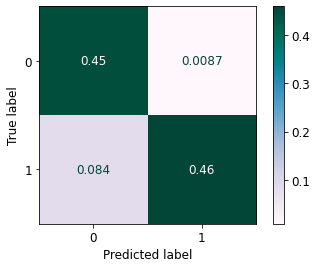

In [ ]:
#confusion matrix for visualizing model errors
conf = confusion_matrix(y_test, pred_dec ,normalize="all")
disp = ConfusionMatrixDisplay(conf).plot(cmap=plt.cm.PuBuGn)

### ROC graph

No Skill: ROC AUC=0.500
Decision Tree: ROC AUC=0.913


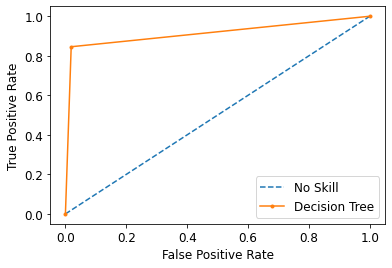

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
dec_probs = Decision_Tree.predict_proba(X_test_vector)
# keep probabilities for the positive outcome only
dec_probs = dec_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
dec_auc = roc_auc_score(y_test, dec_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Decision Tree: ROC AUC=%.3f' % (dec_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
dec_fpr, dec_tpr, _ = roc_curve(y_test, dec_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(dec_fpr, dec_tpr, marker='.', label='Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### Random Forest with TF-IDF Vectorizer

In [ ]:
# The data scaled using the TF-IDF vectorizer, will be used to train the models and print the model score

Random_Forest= RandomForestClassifier()
# Fit the model
Random_Forest.fit(X_train_vector,y_train)
#predict x_test_scaled
pred_rand = Random_Forest.predict(X_test_vector)

In [ ]:
score_rand = classification_funct(Random_Forest,X_train_vector, y_train ,X_test_vector,y_test,pred_rand,"Random Forest Tree" )
score_rand

,Train_Score,Test_Score,Precision_Score,Recall_Score,F1_Score,accuracy
Random Forest Tree,1.0,0.971097,0.979514,0.967098,0.973266,0.971097


In [ ]:
#for the data that has not been upscaled, the model performance deviatest a bit

rand_us = RandomForestClassifier()
# Fit the model
rand_us.fit(X_train_vector_us, y_train_us)
#predict x_test
pred_rand_us = rand_us.predict(X_test_vector_us)

result_df = pd.DataFrame({'Train_Score':rand_us.score(X_train_vector_us,y_train_us),"Test_Score":rand_us.score(X_test_vector_us,y_test_us),
                       "Precision_Score":precision_score(y_test_us,pred_rand_us),"Recall_Score":recall_score(y_test_us,pred_rand_us),
                       "F1_Score":f1_score(y_test_us,pred_rand_us) , "accuracy":accuracy_score(y_test_us,pred_rand_us)}, index=["random forest for data without upscaling"])

In [ ]:
pd.concat([score_rand,result_df])

,Train_Score,Test_Score,Precision_Score,Recall_Score,F1_Score,accuracy
Random Forest Tree,1.0,0.971097,0.979514,0.967098,0.973266,0.971097
random forest for data without upscaling,1.0,0.845627,0.844990,0.993797,0.913372,0.845627


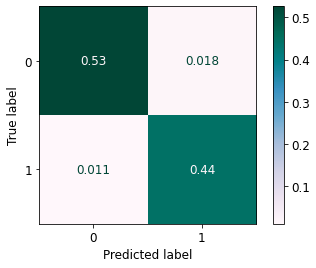

In [ ]:
#confusion matrix for visualizing model errors
conf = confusion_matrix(y_test, pred_rand ,normalize="all",labels=[1,0])
disp = ConfusionMatrixDisplay(conf).plot(cmap=plt.cm.PuBuGn)

No Skill: ROC AUC=0.500
Random Forest: ROC AUC=0.996


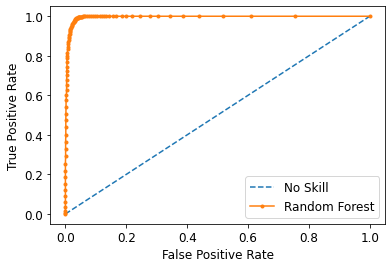

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
rand_probs = Random_Forest.predict_proba(X_test_vector)
# keep probabilities for the positive outcome only
rand_probs = rand_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
rand_auc = roc_auc_score(y_test, rand_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Random Forest: ROC AUC=%.3f' % (rand_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
rand_fpr, rand_tpr, _ = roc_curve(y_test, rand_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(rand_fpr, rand_tpr, marker='.', label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### AdaBoost With TF-IDF Vectorizer

In [ ]:
# The data scaled using the TF-IDF vectorizer, will be used to train the models and print the model score


ada = AdaBoostClassifier(n_estimators= 500, random_state = 0)
# Fit the model
ada.fit(X_train_vector, y_train)
#predict x_test
pred_ada = ada.predict(X_test_vector)

In [ ]:
score_ada = classification_funct(ada,X_train_vector, y_train ,X_test_vector,y_test,pred_ada,"AdaBoost")
score_ada

,Train_Score,Test_Score,Precision_Score,Recall_Score,F1_Score,accuracy
AdaBoost,0.901181,0.870745,0.876632,0.887271,0.881919,0.870745


In [ ]:
#for the data that has not been upscaled, the model performance deviatest a bit

ada_us = AdaBoostClassifier(n_estimators= 500, random_state = 0)
# Fit the model
ada_us.fit(X_train_vector_us, y_train_us)
#predict x_test
pred_ada_us = ada_us.predict(X_test_vector_us)

score_ada_us = classification_funct(ada_us,X_train_vector_us, y_train_us ,X_test_vector_us,y_test_us,pred_ada_us,"AdaBoost for data without upscaling")
"""
result_df = pd.DataFrame({'Train_Score':ada_us.score(X_train_vector_us,y_train_us),"Test_Score":ada_us.score(X_test_vector_us,y_test_us),
                       "Precision_Score":precision_score(y_test_us,pred_ada_us),"Recall_Score":recall_score(y_test_us,pred_ada_us),
                       "F1_Score":f1_score(y_test_us,pred_ada_us) , "accuracy":accuracy_score(y_test_us,pred_ada_us)}, index=["Adaboost for data without upscaling"])
"""

'\nresult_df = pd.DataFrame({\'Train_Score\':ada_us.score(X_train_vector_us,y_train_us),"Test_Score":ada_us.score(X_test_vector_us,y_test_us),\n                       "Precision_Score":precision_score(y_test_us,pred_ada_us),"Recall_Score":recall_score(y_test_us,pred_ada_us),\n                       "F1_Score":f1_score(y_test_us,pred_ada_us) , "accuracy":accuracy_score(y_test_us,pred_ada_us)}, index=["Adaboost for data without upscaling"])\n'

In [ ]:
pd.concat([score_ada,score_ada_us])

,Train_Score,Test_Score,Precision_Score,Recall_Score,F1_Score,accuracy
AdaBoost,0.901181,0.870745,0.876632,0.887271,0.881919,0.870745
AdaBoost for data without upscaling,0.919943,0.873233,0.910855,0.936893,0.923691,0.873233


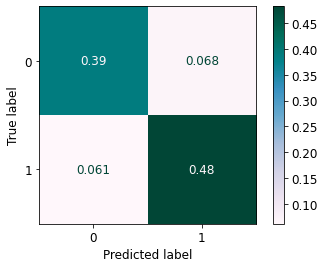

In [ ]:
#confusion matrix for visualizing model errors
conf = confusion_matrix(y_test, pred_ada ,normalize="all")
disp = ConfusionMatrixDisplay(conf).plot(cmap=plt.cm.PuBuGn)

No Skill: ROC AUC=0.500
AdaBoost: ROC AUC=0.942


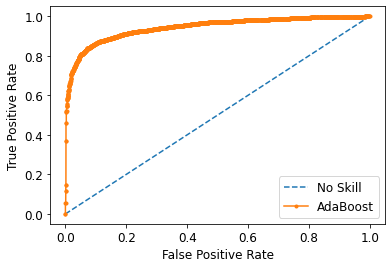

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
ada_probs = ada.predict_proba(X_test_vector)
# keep probabilities for the positive outcome only
ada_probs = ada_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
ada_auc = roc_auc_score(y_test, ada_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('AdaBoost: ROC AUC=%.3f' % (ada_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
ada_fpr, ada_tpr, _ = roc_curve(y_test, ada_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(ada_fpr, ada_tpr, marker='.', label='AdaBoost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

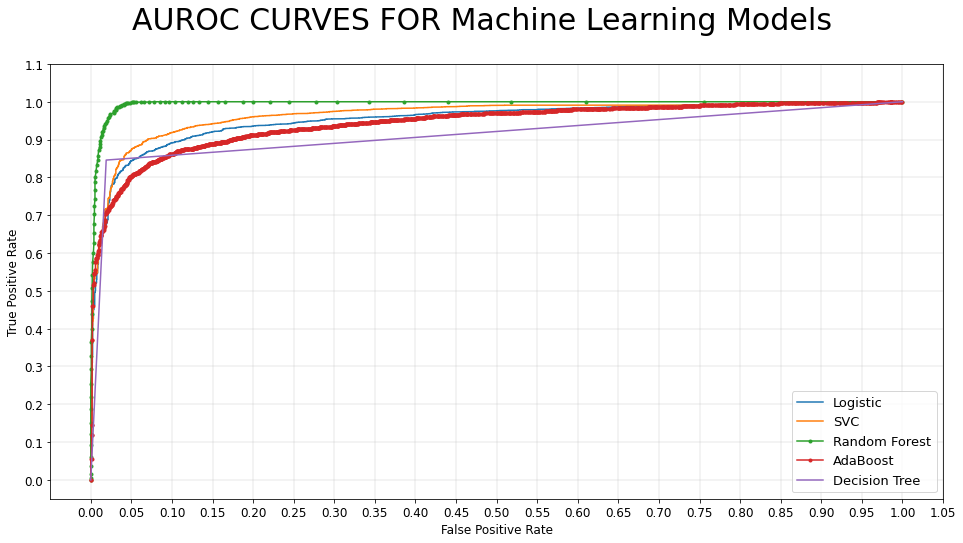

In [ ]:
# plot the roc curve for the model


plt.figure(figsize=(16,8))
plt.plot(lr_fpr, lr_tpr, label='Logistic')
plt.plot(svc_fpr, svc_tpr, label='SVC')
plt.plot(rand_fpr, rand_tpr, marker='.', label='Random Forest')
plt.plot(ada_fpr, ada_tpr, marker='.', label='AdaBoost')
plt.plot(dec_fpr, dec_tpr, label='Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(linewidth=0.3)
plt.legend(fontsize=13)
plt.xticks(np.arange(0,1.1,0.05))
plt.yticks(np.arange(0,1.2,0.1))
plt.suptitle("AUROC CURVES FOR Machine Learning Models",fontsize=30)
plt.show()

In [ ]:
ml_models = pd.concat([score_lr , score_svm , score_rand , score_ada, score_dec]) 

In [ ]:
ml_models

,Train_Score,Test_Score,Precision_Score,Recall_Score,F1_Score,accuracy
logisitc regression,0.918018,0.893633,0.908071,0.895092,0.901535,0.893633
Support Vector Machine,0.940760,0.913146,0.938626,0.899137,0.918457,0.913146
Random Forest Tree,1.000000,0.971097,0.979514,0.967098,0.973266,0.971097
AdaBoost,0.901181,0.870745,0.876632,0.887271,0.881919,0.870745
Decision Tree,1.000000,0.907424,0.981534,0.845739,0.908590,0.907424


## Deep Learning Models

In [ ]:
x = df_upsampled['Review Text'].values
y = df_upsampled['Recommended IND'].values

In [ ]:
#tokenization
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
num_words = 10000
#maximum number of sequences
maxlen= 50
tokenizer = Tokenizer(num_words=num_words)
#fitting words from reviews into the vocabulary
tokenizer.fit_on_texts(x)
#converting a text into a sequence of integers - tokens
xtokens= tokenizer.texts_to_sequences(x)

#making all the sequences of the same length
xpad = pad_sequences(xtokens, padding='post', maxlen = maxlen)

In [ ]:
x[3]

'ordered legging loved hour point belt loop ripped pant leaving hole called customer service sent pair thing happened never even pulled belt loop flimsy shame bc cool looking'

In [ ]:
xpad[3]

array([  17,  222,   82,  644,  467,  329, 1316,  896,   68, 1338,  208,
       1245,  996, 1830,  587,  139,  166,  835,  308,   38,  533,  329,
       1316,  842,  763,  737,  371,  120,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0], dtype=int32)

In [ ]:
#creating the train and test data
xtrain, xtest, ytrain, ytest = train_test_split(xpad, y ,test_size= 0.2, stratify = y, random_state =42)

### LSTM MODEL

In [ ]:
#CODE below for training the LSTM MODEL

In [ ]:
#importing model libraries
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout,GRU,Bidirectional
from keras.initializers import Constant
from tensorflow.keras.optimizers import Adam
from keras.regularizers import l2

In [ ]:

num_words = 10000
#maximum number of sequences
maxlen= 50
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=num_words,output_dim=32,input_length=maxlen))

model_lstm.add(LSTM(units = 64, dropout = 0.4, return_sequences= True))
model_lstm.add(LSTM(units = 64, dropout=0.4, return_sequences = True))

model_lstm.add(LSTM(units = 20))
model_lstm.add(Dropout(0.5))

model_lstm.add(Dense(1, activation='sigmoid'))
model_lstm.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 32)            320000    
                                                                 
 lstm (LSTM)                 (None, 50, 64)            24832     
                                                                 
 lstm_1 (LSTM)               (None, 50, 64)            33024     
                                                                 
 lstm_2 (LSTM)               (None, 20)                6800      
                                                                 
 dropout (Dropout)           (None, 20)                0         
                                                                 
 dense (Dense)               (None, 1)                 21        
                                                                 
Total params: 384,677
Trainable params: 384,677
Non-trai

In [ ]:
#stopping the training process if the best epoch is not reached in 10 steps(based on val loss)
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_loss", mode="auto", verbose=1, patience = 10, restore_best_weights=True)

In [ ]:
hist1 = model_lstm.fit(xtrain,ytrain, epochs=20, batch_size=32, validation_data=(xtest , ytest), callbacks= [early_stop])

Epoch 1/20
852/852 [==============================] - 18s 11ms/step - loss: 0.3779 - accuracy: 0.8285 - val_loss: 0.2634 - val_accuracy: 0.8992
Epoch 2/20
852/852 [==============================] - 8s 10ms/step - loss: 0.2438 - accuracy: 0.9146 - val_loss: 0.2346 - val_accuracy: 0.9149
Epoch 3/20
852/852 [==============================] - 8s 10ms/step - loss: 0.1976 - accuracy: 0.9321 - val_loss: 0.2322 - val_accuracy: 0.9219
Epoch 4/20
852/852 [==============================] - 8s 10ms/step - loss: 0.1702 - accuracy: 0.9438 - val_loss: 0.2187 - val_accuracy: 0.9221
Epoch 5/20
852/852 [==============================] - 8s 10ms/step - loss: 0.1514 - accuracy: 0.9501 - val_loss: 0.2314 - val_accuracy: 0.9281
Epoch 6/20
852/852 [==============================] - 8s 10ms/step - loss: 0.1346 - accuracy: 0.9554 - val_loss: 0.2270 - val_accuracy: 0.9272
Epoch 7/20
852/852 [==============================] - 8s 10ms/step - loss: 0.1241 - accuracy: 0.9599 - val_loss: 0.2129 - val_accuracy: 0.928

### loss plot graph for LSTM

In [ ]:
model_lstm_loss = pd.DataFrame(model_lstm.history.history)
model_lstm_loss.head()

,loss,accuracy,val_loss,val_accuracy
0,0.377936,0.828516,0.263375,0.899208
1,0.243765,0.914643,0.234608,0.914906
2,0.197625,0.932103,0.232202,0.921948
3,0.170245,0.943768,0.218748,0.922095
4,0.151440,0.950077,0.231397,0.928110


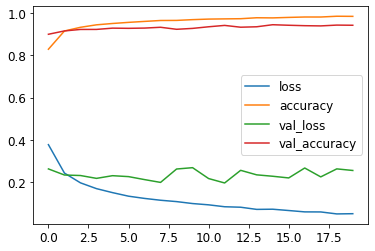

In [ ]:
model_lstm_loss.plot()

In [ ]:
from sklearn.metrics import roc_curve, auc

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


### AUROC Graphs for LSTM

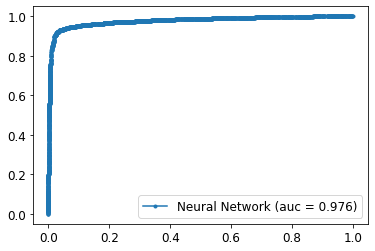

In [ ]:
ypred_lstm = model_lstm.predict(xtest).ravel()

lstm_fpr_keras, lstm_tpr_keras, lstm_thresholds_keras = roc_curve(ytest, ypred_lstm)
auc_keras_lstm = auc(lstm_fpr_keras, lstm_tpr_keras)
plt.plot(lstm_fpr_keras, lstm_tpr_keras, marker='.', label='Neural Network (auc = %0.3f)' % auc_keras_lstm)
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = (model_lstm.predict(xtest) >= 0.5).astype("int32")  

cm_lstm = confusion_matrix(ytest, y_pred,normalize="all")
cm_lstm = np.around(cm_lstm.astype('float'),decimals= 6)

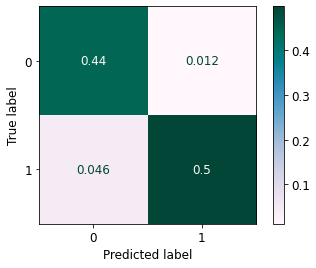

In [ ]:

disp = ConfusionMatrixDisplay(cm_lstm).plot(cmap=plt.cm.PuBuGn)

#### Confusion Matrix for LSTM

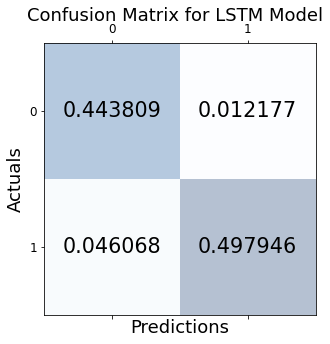

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm_lstm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm_lstm.shape[0]):
    for j in range(cm_lstm.shape[1]):
        ax.text(x=j, y=i,s=cm_lstm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.suptitle('Confusion Matrix for LSTM Model', fontsize=18)
plt.show()

#### Classification Report for LSTM

In [ ]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      3108
           1       0.98      0.92      0.94      3708

    accuracy                           0.94      6816
   macro avg       0.94      0.94      0.94      6816
weighted avg       0.94      0.94      0.94      6816



In [ ]:
y_pred_lstm = (model_lstm.predict(xtest) >= 0.5).astype("int32") 
y_pred_lstm

array([[1],
       [1],
       [0],
       ...,
       [1],
       [1],
       [0]], dtype=int32)

In [ ]:
def classification_funct_rnn(model, x_train,y_train,x_test,y_test,y_pred,model_name):
  y_pred = (y_pred >=0.5).astype("int32")


  result_df = pd.DataFrame({'Train_Score':model.evaluate(x_train,y_train)[1],"Test_Score":model.evaluate(x_test,y_test)[1],
                    "Precision_Score":precision_score(y_test,y_pred),"Recall_Score":recall_score(y_test,y_pred),
                    "F1_Score":f1_score(y_test,y_pred) , "accuracy":accuracy_score(y_test,y_pred)}, index=[model_name])
  return result_df

In [ ]:
score_lstm = classification_funct_rnn(model_lstm, xtrain,ytrain,xtest,ytest,y_pred_lstm,"LSTM")

213/213 [==============================] - 1s 4ms/step - loss: 0.2560 - accuracy: 0.9418


In [ ]:
score_lstm

,Train_Score,Test_Score,Precision_Score,Recall_Score,F1_Score,accuracy
LSTM,0.994645,0.941755,0.976129,0.915318,0.944746,0.941755


In [ ]:
review1 = "Love this dress"
review2 = "Absolutely wonderful. silky and sexy and comfortable"
review3 = "i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up!"
review4 = "I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!"
review5 = 'This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!'
review6 = 'I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of dress.'
review7 = 'I love this dress. i usually get an xs but it runs a little snug in bust so i ordered up a size. very flattering and feminine with the usual retailer flair for style.'
review8 = 'Dress runs small esp where the zipper area runs. i ordered the sp which typically fits me and it was very tight! the material on the top looks and feels very cheap that even just pulling on it will cause it to rip the fabric. pretty disappointed as it was going to be my christmas dress this year! needless to say it will be going back.'
review9 =  "if you are at least average height or taller, this may look good on you."
review10 = "sadly will be returning, but i'm sure i will find something to exchange it for!"
review11 = "Cute little dress fits tts. it is a little high waisted. good length for my 5'9 height. i like the dress, i'm just not in love with it. i dont think it looks or feels cheap. it appears just as pictured."
review12 = 'Loved the material, but i didnt really look at how long the dress was before i purchased both a large and a medium. im 5\'5" and there was atleast 5" of material at my feet. the gaps in the front are much wider than they look. felt like the dress just fell flat. both were returned. im usually a large and the med fit better. 36d 30 in jeans'
review13 = "I have been waiting for this sweater coat to ship for weeks and i was so excited for it to arrive. this coat is not true to size and made me look short and squat."
review14 = 'not bad '
reviews = [review1, review2, review3, review4, review5, review6, review7, review8, review9, review10, review11, review12, review13, review14]

In [ ]:
tokens = tokenizer.texts_to_sequences(reviews) 
tokens_pad = pad_sequences(tokens, maxlen=maxlen)
tokens_pad.shape

(14, 50)

In [ ]:
mod_pred_lstm = model_lstm.predict(tokens_pad)
mod_pred_lstm

array([[8.3488166e-01],
       [8.0841327e-01],
       [8.4964114e-01],
       [8.1383550e-01],
       [9.9908304e-01],
       [7.9696065e-01],
       [7.8659350e-01],
       [3.9663742e-04],
       [7.8681296e-01],
       [6.1702228e-01],
       [8.1163132e-01],
       [5.3143710e-01],
       [8.2849526e-01],
       [8.4376162e-01]], dtype=float32)

In [ ]:
df_pred = pd.DataFrame(mod_pred_lstm, index=reviews)
df_pred.rename(columns={0: 'Pred_Proba'}, inplace=True)

In [ ]:
df_pred

,Pred_Proba
Love this dress,0.834882
Absolutely wonderful. silky and sexy and comfortable,0.808413
i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up!,0.849641
"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",0.813836
This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,0.999083
"I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of dress.",0.796961
I love this dress. i usually get an xs but it runs a little snug in bust so i ordered up a size. very flattering and feminine with the usual retailer flair for style.,0.786593
Dress runs small esp where the zipper area runs. i ordered the sp which typically fits me and it was very tight! the material on the top looks and feels very cheap that even just pulling on it will cause it to rip the fabric. pretty disappointed as it was going to be my christmas dress this year! needless to say it will be going back.,0.000397
"if you are at least average height or taller, this may look good on you.",0.786813
"sadly will be returning, but i'm sure i will find something to exchange it for!",0.617022


### GRU MODEL

In [ ]:
model_gru = Sequential()
model_gru.add(Embedding(input_dim=num_words,output_dim=32,input_length=maxlen))
model_gru.add(GRU(units=48, return_sequences=True))
model_gru.add(GRU(units=24, return_sequences = True))
model_gru.add(GRU(units=12)) 
model_gru.add(Dropout(0.4))
model_gru.add(Dense(1,activation='sigmoid'))
optimizer = Adam(learning_rate = 0.006)

model_gru.compile(loss="binary_crossentropy",optimizer= 'Adam', metrics=["Accuracy"])
model_gru.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 32)            320000    
                                                                 
 gru (GRU)                   (None, 50, 48)            11808     
                                                                 
 gru_1 (GRU)                 (None, 50, 24)            5328      
                                                                 
 gru_2 (GRU)                 (None, 12)                1368      
                                                                 
 dropout_1 (Dropout)         (None, 12)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 13        
                                                                 
Total params: 338,517
Trainable params: 338,517
Non-tr

In [ ]:
hist = model_gru.fit(xtrain,ytrain, epochs=20, batch_size=32, validation_data=(xtest , ytest), callbacks= [early_stop])

Epoch 1/20
852/852 [==============================] - 12s 9ms/step - loss: 0.4936 - Accuracy: 0.7332 - val_loss: 0.2880 - val_Accuracy: 0.8933
Epoch 2/20
852/852 [==============================] - 7s 9ms/step - loss: 0.2286 - Accuracy: 0.9227 - val_loss: 0.2209 - val_Accuracy: 0.9209
Epoch 3/20
852/852 [==============================] - 7s 9ms/step - loss: 0.1529 - Accuracy: 0.9534 - val_loss: 0.2026 - val_Accuracy: 0.9340
Epoch 4/20
852/852 [==============================] - 7s 8ms/step - loss: 0.1158 - Accuracy: 0.9683 - val_loss: 0.2058 - val_Accuracy: 0.9365
Epoch 5/20
852/852 [==============================] - 7s 8ms/step - loss: 0.0914 - Accuracy: 0.9760 - val_loss: 0.2177 - val_Accuracy: 0.9359
Epoch 6/20
852/852 [==============================] - 7s 8ms/step - loss: 0.0751 - Accuracy: 0.9804 - val_loss: 0.2255 - val_Accuracy: 0.9404
Epoch 7/20
852/852 [==============================] - 7s 8ms/step - loss: 0.0619 - Accuracy: 0.9844 - val_loss: 0.2612 - val_Accuracy: 0.9343
Epoch

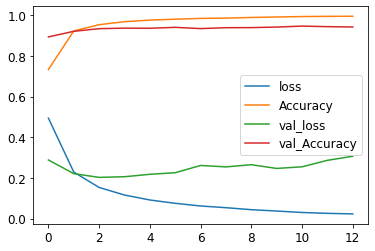

In [ ]:
model_gru_loss = pd.DataFrame(model_gru.history.history)
model_gru_loss.plot()

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score,auc

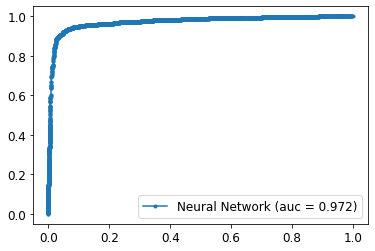

In [ ]:
ypred_gru = model_gru.predict(xtest).ravel()

gru_fpr_keras, gru_tpr_keras, gru_thresholds_keras = roc_curve(ytest, ypred_gru)
gru_auc_keras = auc(gru_fpr_keras, gru_tpr_keras)
plt.plot(gru_fpr_keras, gru_tpr_keras, marker='.', label='Neural Network (auc = %0.3f)' % gru_auc_keras)
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = (model_gru.predict(xtest) >= 0.5).astype("int32")  

cm_gru = confusion_matrix(ytest, y_pred, normalize="all")
cm_gru = np.around(cm_gru.astype('float'),decimals= 4)

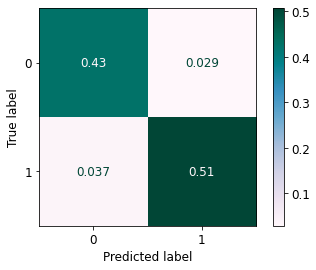

In [ ]:
disp = ConfusionMatrixDisplay(cm_gru).plot(cmap=plt.cm.PuBuGn)

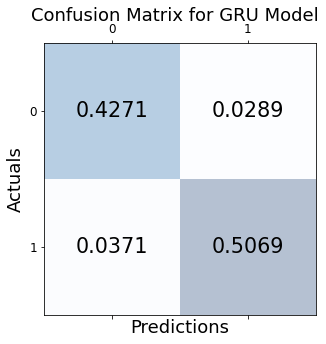

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm_gru, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm_gru.shape[0]):
    for j in range(cm_gru.shape[1]):
        ax.text(x=j, y=i,s=cm_gru[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.suptitle('Confusion Matrix for GRU Model', fontsize=18)
plt.show()

### Classification report for GRU model

In [ ]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      3108
           1       0.95      0.93      0.94      3708

    accuracy                           0.93      6816
   macro avg       0.93      0.93      0.93      6816
weighted avg       0.93      0.93      0.93      6816



In [ ]:
y_pred_gru = (model_gru.predict(xtest) >= 0.5).astype("int32") 
score_gru = classification_funct_rnn(model_gru, xtrain,ytrain,xtest,ytest,y_pred_gru,"GRU")

213/213 [==============================] - 1s 4ms/step - loss: 0.2026 - Accuracy: 0.9340


In [ ]:
score_gru


,Train_Score,Test_Score,Precision_Score,Recall_Score,F1_Score,accuracy
GRU,0.970435,0.933979,0.946057,0.931769,0.938859,0.933979


In [ ]:
mod_pred_gru = model_gru.predict(tokens_pad)

df_pred_gru = pd.DataFrame(mod_pred_gru, index=reviews)
df_pred_gru.rename(columns={0: 'Pred_Proba'}, inplace=True)
df_pred_gru

,Pred_Proba
Love this dress,0.617921
Absolutely wonderful. silky and sexy and comfortable,0.897140
i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up!,0.332997
"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",0.971385
This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,0.995024
"I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of dress.",0.732579
I love this dress. i usually get an xs but it runs a little snug in bust so i ordered up a size. very flattering and feminine with the usual retailer flair for style.,0.989048
Dress runs small esp where the zipper area runs. i ordered the sp which typically fits me and it was very tight! the material on the top looks and feels very cheap that even just pulling on it will cause it to rip the fabric. pretty disappointed as it was going to be my christmas dress this year! needless to say it will be going back.,0.025084
"if you are at least average height or taller, this may look good on you.",0.581323
"sadly will be returning, but i'm sure i will find something to exchange it for!",0.418624


### BI-LSTM Model

In [ ]:
model_bilstm = Sequential()

model_bilstm.add(Embedding(input_dim = num_words, output_dim = 32,input_length = maxlen))

model_bilstm.add(Bidirectional(LSTM(units = 48,return_sequences = True )))
model_bilstm.add(Bidirectional(LSTM(units = 24, return_sequences = True)))


model_bilstm.add(Bidirectional(LSTM(units = 20)))
model_bilstm.add(Dropout(0.5))

model_bilstm.add(Dense(1, activation = 'sigmoid'))

optimizer = Adam(lr = 0.004)
model_bilstm.compile(loss = 'binary_crossentropy', optimizer = optimizer, metrics = ["Accuracy"])

model_bilstm.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 50, 32)            320000    
                                                                 
 bidirectional (Bidirectiona  (None, 50, 96)           31104     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 50, 48)           23232     
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (None, 40)               11040     
 nal)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 40)                0         
                                                      

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
model_bilstm.fit(xtrain,ytrain, epochs=20, batch_size=32, validation_data=(xtest , ytest), callbacks= [early_stop])

Epoch 1/20
852/852 [==============================] - 23s 18ms/step - loss: 0.3659 - Accuracy: 0.8499 - val_loss: 0.2608 - val_Accuracy: 0.8996
Epoch 2/20
852/852 [==============================] - 13s 15ms/step - loss: 0.2155 - Accuracy: 0.9253 - val_loss: 0.2227 - val_Accuracy: 0.9187
Epoch 3/20
852/852 [==============================] - 13s 15ms/step - loss: 0.1499 - Accuracy: 0.9508 - val_loss: 0.2138 - val_Accuracy: 0.9262
Epoch 4/20
852/852 [==============================] - 13s 16ms/step - loss: 0.1060 - Accuracy: 0.9661 - val_loss: 0.2079 - val_Accuracy: 0.9356
Epoch 5/20
852/852 [==============================] - 13s 16ms/step - loss: 0.0818 - Accuracy: 0.9752 - val_loss: 0.2228 - val_Accuracy: 0.9366
Epoch 6/20
852/852 [==============================] - 13s 16ms/step - loss: 0.0620 - Accuracy: 0.9813 - val_loss: 0.2018 - val_Accuracy: 0.9473
Epoch 7/20
852/852 [==============================] - 13s 15ms/step - loss: 0.0508 - Accuracy: 0.9859 - val_loss: 0.2442 - val_Accuracy:

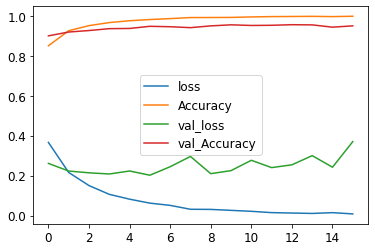

In [ ]:
model_bilstm_loss = pd.DataFrame(model_bilstm.history.history)
model_bilstm_loss.plot()

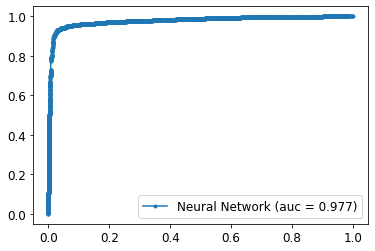

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score,auc
ypred_bilstm = model_bilstm.predict(xtest).ravel()

bilstm_fpr_keras, bilstm_tpr_keras, bilstm_thresholds_keras = roc_curve(ytest, ypred_bilstm)
bilstm_auc_keras = auc(bilstm_fpr_keras, bilstm_tpr_keras)
plt.plot(bilstm_fpr_keras, bilstm_tpr_keras, marker='.', label='Neural Network (auc = %0.3f)' % bilstm_auc_keras)
plt.legend()
plt.show()

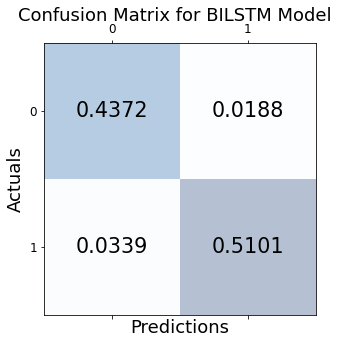

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = (model_bilstm.predict(xtest) >= 0.5).astype("int32")  

cm_bilstm = confusion_matrix(ytest, y_pred,normalize="all")
cm_bilstm = np.around(cm_bilstm.astype('float'),decimals= 4)
#cm= np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], decimals=2)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm_bilstm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm_bilstm.shape[0]):
    for j in range(cm_bilstm.shape[1]):
        ax.text(x=j, y=i,s=cm_bilstm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.suptitle('Confusion Matrix for BILSTM Model', fontsize=18)
plt.show()

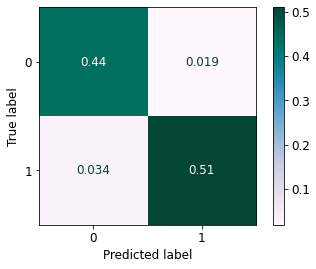

In [ ]:
disp = ConfusionMatrixDisplay(cm_bilstm).plot(cmap=plt.cm.PuBuGn)

### Classification report for BI-LSTM Model 

In [ ]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      3108
           1       0.96      0.94      0.95      3708

    accuracy                           0.95      6816
   macro avg       0.95      0.95      0.95      6816
weighted avg       0.95      0.95      0.95      6816



### Performance of BI-LSTM model

In [ ]:
y_pred_bilstm = (model_bilstm.predict(xtest) >= 0.5).astype("int32") 
score_bilstm = classification_funct_rnn(model_bilstm, xtrain,ytrain,xtest,ytest,y_pred_bilstm,"BI-LSTM")

213/213 [==============================] - 1s 6ms/step - loss: 0.2018 - Accuracy: 0.9473


In [ ]:
score_bilstm

,Train_Score,Test_Score,Precision_Score,Recall_Score,F1_Score,accuracy
BI-LSTM,0.990023,0.94733,0.964494,0.937702,0.950909,0.94733


In [ ]:
ann_models = pd.concat([score_lstm,score_gru,score_bilstm])
ann_models

,Train_Score,Test_Score,Precision_Score,Recall_Score,F1_Score,accuracy
LSTM,0.994645,0.941755,0.976129,0.915318,0.944746,0.941755
GRU,0.970435,0.933979,0.946057,0.931769,0.938859,0.933979
BI-LSTM,0.990023,0.947330,0.964494,0.937702,0.950909,0.947330


In [ ]:
mod_pred_bilstm = model_bilstm.predict(tokens_pad)

df_pred_bilstm = pd.DataFrame(mod_pred_bilstm, index=reviews)
df_pred_bilstm.rename(columns={0: 'Pred_Proba'}, inplace=True)
df_pred_bilstm

,Pred_Proba
Love this dress,0.903361
Absolutely wonderful. silky and sexy and comfortable,0.887784
i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up!,0.839877
"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",0.949546
This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,0.949939
"I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of dress.",0.948197
I love this dress. i usually get an xs but it runs a little snug in bust so i ordered up a size. very flattering and feminine with the usual retailer flair for style.,0.951634
Dress runs small esp where the zipper area runs. i ordered the sp which typically fits me and it was very tight! the material on the top looks and feels very cheap that even just pulling on it will cause it to rip the fabric. pretty disappointed as it was going to be my christmas dress this year! needless to say it will be going back.,0.063611
"if you are at least average height or taller, this may look good on you.",0.924961
"sadly will be returning, but i'm sure i will find something to exchange it for!",0.878468


In [ ]:
final_model_scores = pd.concat([ml_models,ann_models])

In [ ]:
final_model_scores.sort_values("Test_Score",ascending=False)

,Train_Score,Test_Score,Precision_Score,Recall_Score,F1_Score,accuracy
Random Forest Tree,1.000000,0.971097,0.979514,0.967098,0.973266,0.971097
BI-LSTM,0.990023,0.947330,0.964494,0.937702,0.950909,0.947330
LSTM,0.994645,0.941755,0.976129,0.915318,0.944746,0.941755
GRU,0.970435,0.933979,0.946057,0.931769,0.938859,0.933979
Support Vector Machine,0.940760,0.913146,0.938626,0.899137,0.918457,0.913146
Decision Tree,1.000000,0.907424,0.981534,0.845739,0.908590,0.907424
logisitc regression,0.918018,0.893633,0.908071,0.895092,0.901535,0.893633
AdaBoost,0.901181,0.870745,0.876632,0.887271,0.881919,0.870745


In [ ]:
final_model_scores

,Train_Score,Test_Score,Precision_Score,Recall_Score,F1_Score,accuracy
logisitc regression,0.918018,0.893633,0.908071,0.895092,0.901535,0.893633
Support Vector Machine,0.940760,0.913146,0.938626,0.899137,0.918457,0.913146
Random Forest Tree,1.000000,0.971097,0.979514,0.967098,0.973266,0.971097
AdaBoost,0.901181,0.870745,0.876632,0.887271,0.881919,0.870745
Decision Tree,1.000000,0.907424,0.981534,0.845739,0.908590,0.907424
LSTM,0.994645,0.941755,0.976129,0.915318,0.944746,0.941755
GRU,0.970435,0.933979,0.946057,0.931769,0.938859,0.933979
BI-LSTM,0.990023,0.947330,0.964494,0.937702,0.950909,0.947330


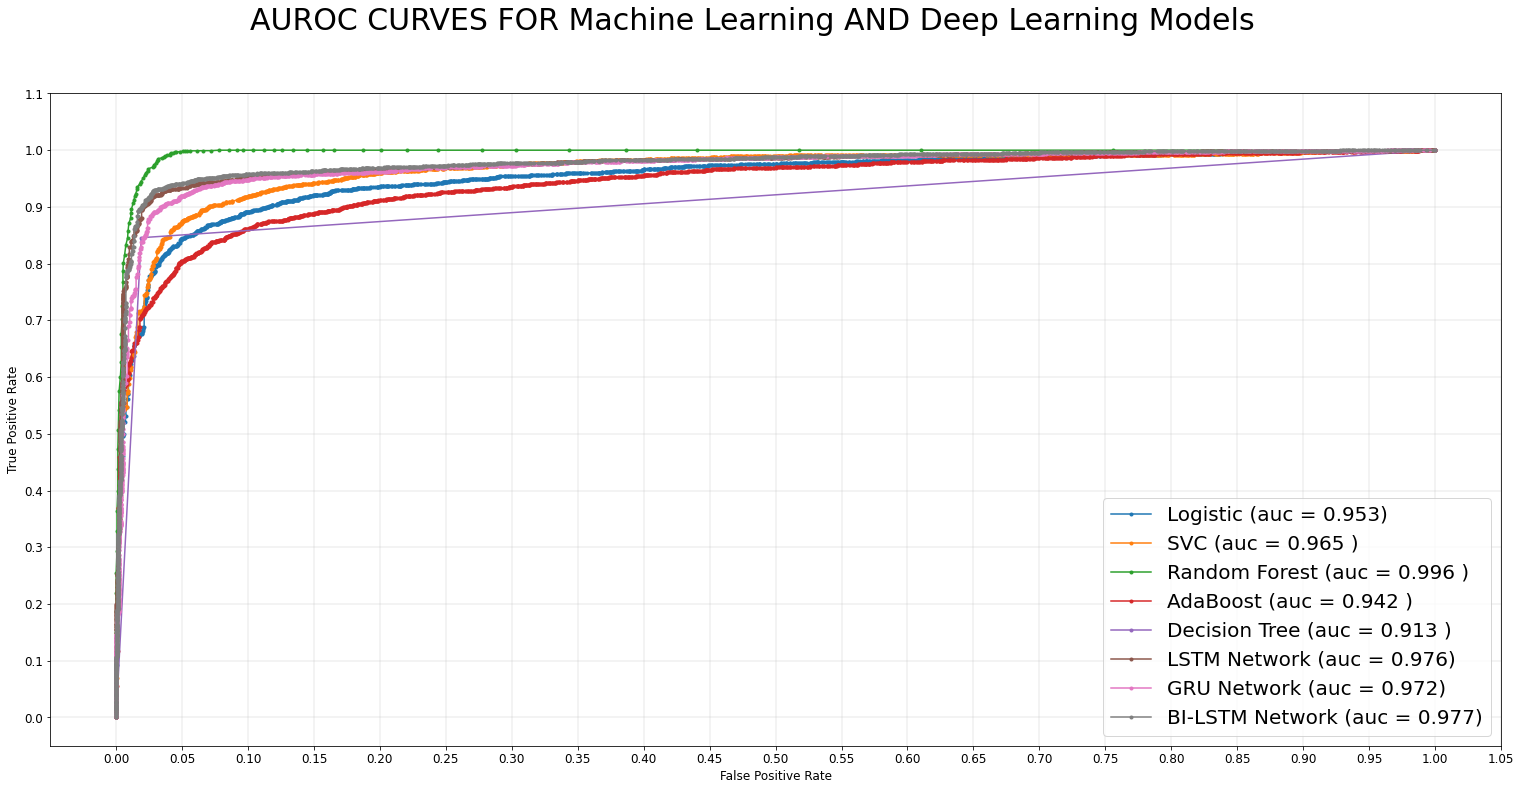

In [ ]:
plt.figure(figsize=(26,12))
plt.plot(lr_fpr, lr_tpr,marker='.' ,label='Logistic (auc = %0.3f)'%lr_auc )
plt.plot(svc_fpr, svc_tpr,marker='.', label='SVC (auc = %0.3f )'%svc_auc)
plt.plot(rand_fpr, rand_tpr, marker='.', label='Random Forest (auc = %0.3f )'%rand_auc)
plt.plot(ada_fpr, ada_tpr, marker='.', label='AdaBoost (auc = %0.3f )'%ada_auc)
plt.plot(dec_fpr, dec_tpr, marker='.' ,label='Decision Tree (auc = %0.3f )'%dec_auc)
plt.plot(lstm_fpr_keras, lstm_tpr_keras, marker='.', label='LSTM Network (auc = %0.3f)' % auc_keras_lstm)
plt.plot(gru_fpr_keras, gru_tpr_keras, marker='.', label='GRU Network (auc = %0.3f)' % gru_auc_keras)
plt.plot(bilstm_fpr_keras, bilstm_tpr_keras, marker='.', label='BI-LSTM Network (auc = %0.3f)' % bilstm_auc_keras)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(linewidth=0.3)
plt.legend(fontsize=20)
plt.xticks(np.arange(0,1.1,0.05))
plt.yticks(np.arange(0,1.2,0.1))
plt.suptitle("AUROC CURVES FOR Machine Learning AND Deep Learning Models",fontsize=30)
plt.show()